![](https://img.kaikeba.com/web/kkb_index/img_index_logo.png)

# 人工智能基础课机器学习 第三节课作业 线性回归

同学们大家好，本次作业是考察学生对线性回归的理解与SKLearn的使用，以及pandas的使用。

本次作业的数据集：data.csv
这份数据代表了一个循环发电厂，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)

问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即: PE=W0+W1∗AT+W2∗V+W3∗AP+W4∗RH 而需要学习的，就是W0,W1,W2,W3,W4这5个参数。


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 第一步：读取样本数据，并将数据集分为训练集和测试集




In [31]:
data = pd.read_csv('data(1).csv')
# data.head()
x = data.iloc[:,[0,1,2,3]]
y = data.iloc[:,[4]]
# print(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12345)
print(y_test)

          PE
4044  435.38
7068  459.43
5846  470.92
1975  470.80
4701  452.85
...      ...
3549  427.98
8807  483.74
3024  441.13
5696  467.19
1963  436.56

[2871 rows x 1 columns]


#  第二步：训练Linear Regreesion模型，得到训练参数



In [29]:
lr = LinearRegression()
lr.fit(x_train,y_train)
score_test = lr.score(x_test,y_test)
print(score_test)

0.9285536761442575


# 第三步：使用均方误差和均方根误差在测试集上的表现来评价模型的好坏。



In [43]:
m = np.shape(y_test)[0]
y_pred = lr.predict(x_test)
# 均方误差
mse = ((y_test - y_pred)**2).sum()/m
# 均方根误差
rmse = np.sqrt(mse)
print('mse:',str(mse),' \nrmse:',str(rmse))

mse: PE    20.579659
dtype: float64  
rmse: PE    4.536481
dtype: float64


# 第四步：可视化的方式直观的表示模型学习效果的好坏



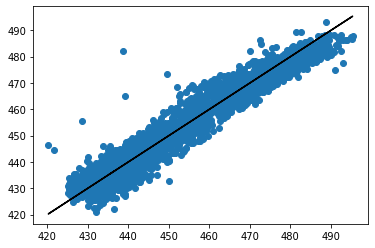

In [63]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='black')
plt.show()